# COMPLETED BY: 
# Alejandro Jarabo Peñas (AJP)
# Miguel Taibo Martínez (MTM)

In this workshop we are goin to work with the dataset of the UPM researchers and their publications. This dataset is composed by two files. These files are an extended versión of the csv that we used in the web application workshops.

Our goal is obtain as much information as we can from this dataset. We will achieve this in two ways: we will answer questions with numeric values (e.g. what is the average number publications of an UPM reaearcher? or, how many citations have the reseachers, suming all their publications?) or we will generate some charts to present information in a visual way (e.g. how is the relation between the publication year of a paper and its number of citations? or, how is the histogram of the number of publications by researcher?)

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

publications = pd.read_pickle("publications")
researchers = pd.read_pickle("researchers")

# Dataset exploration
Any project related with data analysis starts with a study of the data itself: 
* What kind of data do we have?
* How is it organized? How many columns have each dataframe?
* Are there wrong or missing values?
* What does each value of a column means? How many different values are in each column?

With the examples we saw in the previous workshop try to answer that questions.

In [149]:
researchers.head()

auth_id          name       last_name  citations  cited_by  \
0   7005227142  José Antonio           Cobos     5267.0    3940.0   
1  55708653400        Javier          LLorca     9830.0    6350.0   
2   7007057622        Manuel          Elices     8251.0    4563.0   
3   6701646524    Marcela G.  González-Gross     7167.0    5244.0   
4   8899577600        Javier            Bajo     2213.0    1376.0   

   publications                orcid  
0         343.0                  NaN  
1         301.0                  NaN  
2         285.0                  NaN  
3         280.0                  NaN  
4         271.0  0000-0003-0824-4133

In [150]:
researchers.info()
#Some rows have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7175 entries, 0 to 7174
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   auth_id       7175 non-null   int64  
 1   name          7170 non-null   object 
 2   last_name     7175 non-null   object 
 3   citations     7174 non-null   float64
 4   cited_by      7175 non-null   float64
 5   publications  7173 non-null   float64
 6   orcid         616 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 392.5+ KB


In [151]:
researchers.describe()
#Negative citations?

auth_id    citations     cited_by  publications
count  7.175000e+03  7174.000000  7175.000000   7173.000000
mean   4.233308e+10   100.549902    78.590430      8.809703
std    2.045068e+10   406.214383   292.216692     20.705277
min    6.503849e+09   -10.000000     0.000000      0.000000
25%    2.407418e+10     1.000000     1.000000      1.000000
50%    5.625455e+10     7.000000     6.000000      2.000000
75%    5.719483e+10    42.000000    37.000000      7.000000
max    5.720871e+10  9830.000000  6761.000000    343.000000

In [152]:
researchers.name.unique()[0:30]
#Some extrange or not useful names

array(['José Antonio', 'Javier', 'Manuel', 'Marcela G.', 'Shalom',
       'Juan C.', 'Óscar G.', 'Pedro', 'Pablo', 'Óscar', 'Javier D.',
       'José Manuel', 'Paolo P.', 'Alexander N.', 'Andres',
       'María Teresa', 'Asunción', 'Jesús Ángel', 'J. L.', 'Francisco',
       'Miguel Ángel', 'Concha', 'T.', 'Miguel A.', 'Enrique', 'Diego',
       'Carlos D.', 'Eduardo', 'José María', 'Ana María'], dtype=object)

In [153]:
publications.head()

pages                                            authors  \
0   15.0  [57204955584, 57200520067, 24922369500, 244382...   
1    8.0  [7005227142, 57200519327, 57200511770, 2443825...   
2    8.0  [57200511770, 57200519327, 56249124100, 244382...   
3    5.0  [57195619519, 57204116610, 24438258500, 700522...   
4    6.0  [57200519327, 57200511770, 24438258500, 562491...   

                                               title  document_id       date  \
0  High-Efficiency High-Bandwidth Four-Quadrant F...  85058136304 2019-06-01   
1  Energy-Buffered Single-Phase Inverter Operatin...  85060314395 2018-12-03   
2  ZVS transitions in Multi-Mode Single Stage Inv...  85060302761 2018-12-03   
3  Equivalent Parameters of Round and Litz Wire C...  85060302746 2018-12-03   
4  Digital Variable Frequency Control of a Single...  85060299891 2018-12-03   

                                             journal  openaccess  cited_count  \
0  IEEE Journal of Emerging and Selected Topics i...       False          0.0   
1  2018 IEEE Energy Conversion Congress and Expos...       False          2.0   
2  2018 IEEE Energy Conversion Congress and Expos...       False          1.0   
3  2018 IEEE Energy Conversion Congress and Expos...       False          0.0   
4  2018 IEEE Energy Conversion Congress and Expos...       False          1.0   

               type  
0           Article  
1  Conference Paper  
2  Conference Paper  
3  Conference Paper  
4  Conference Paper

In [154]:
publications.info()
#Some values are null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35964 entries, 0 to 35963
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   pages        29764 non-null  float64       
 1   authors      35949 non-null  object        
 2   title        35953 non-null  object        
 3   document_id  35964 non-null  object        
 4   date         35952 non-null  datetime64[ns]
 5   journal      35768 non-null  object        
 6   openaccess   35964 non-null  bool          
 7   cited_count  35955 non-null  float64       
 8   type         35955 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(5)
memory usage: 2.5+ MB


In [155]:
publications.describe()
#Negative pages?

pages   cited_count
count  2.976400e+04  35955.000000
mean   7.681272e+02     13.008260
std    1.177253e+05     38.461635
min   -1.255000e+07      0.000000
25%    6.000000e+00      1.000000
50%    9.000000e+00      4.000000
75%    1.300000e+01     13.000000
max    1.296919e+07   2406.000000

# Data cleaning
After a first view of the data and before to start working with it, we must clean it. This proccess is called preprocessing and it is crucial to be able to obtain good results. We will discard invalid data, fill missing values, drop redundant information, etc. We need to create a dataset with the following restrictions.
* All reserachers should have name, last_name and auth_id. All publications should have title, journal and document_id. Drop the rows that do not match this condition (check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
* There are no duplicated publications (same title) or researchers (same name and lastname). To find duplicates check https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
* All numeric fields must be an integer number bigger or equal to 0. Replace missing values with 0, round decimal values
* For the rest of the fields, rows that contain incorrect values should be discarded

In [156]:
#Drop rows with null values in selected columns subset
researchers = researchers.dropna(subset=['name', 'last_name','auth_id'])
publications = publications.dropna(subset=['title','journal','document_id'])

In [157]:
#Drop duplicates in selected columns subset
researchers = researchers.drop_duplicates(subset=['name','last_name'], keep='last')
publications = publications.drop_duplicates(subset=['title'], keep='last')

In [158]:
#Replace null values with 0
researchers.citations = researchers.citations.fillna(0)
researchers.cited_by = researchers.cited_by.fillna(0)
researchers.publications = researchers.publications.fillna(0)

publications.pages = publications.pages.fillna(0)
publications.cited_count = publications.cited_count.fillna(0)

In [159]:
#Discard values < 0
researchers = researchers[(researchers.citations >= 0) & \
                         (researchers.cited_by >= 0) & \
                         (researchers.publications >= 0)]
publications = publications[(publications.pages >= 0) & \
                           (publications.cited_count >= 0)]

In [160]:
#Change researchers data types
res_dtype_dict = {
    'name': 'str',
    'last_name': 'str',
    'citations': 'uint16',
    'cited_by': 'uint16',
    'publications': 'uint16'
}
researchers = researchers.astype(res_dtype_dict)
researchers.head()

auth_id          name       last_name  citations  cited_by  \
0   7005227142  José Antonio           Cobos       5267      3940   
1  55708653400        Javier          LLorca       9830      6350   
2   7007057622        Manuel          Elices       8251      4563   
3   6701646524    Marcela G.  González-Gross       7167      5244   
4   8899577600        Javier            Bajo       2213      1376   

   publications                orcid  
0           343                  NaN  
1           301                  NaN  
2           285                  NaN  
3           280                  NaN  
4           271  0000-0003-0824-4133

In [161]:
#Change publications data types
pub_dtype_dict = {
    'pages': 'uint16',
    'title': 'str',
    'journal': 'str',
    'openaccess': 'bool',
    'cited_count': 'uint16', 
    'type': 'str'
}
publications = publications.astype(pub_dtype_dict)
publications.head()

pages                                            authors  \
0     15  [57204955584, 57200520067, 24922369500, 244382...   
1      8  [7005227142, 57200519327, 57200511770, 2443825...   
2      8  [57200511770, 57200519327, 56249124100, 244382...   
3      5  [57195619519, 57204116610, 24438258500, 700522...   
4      6  [57200519327, 57200511770, 24438258500, 562491...   

                                               title  document_id       date  \
0  High-Efficiency High-Bandwidth Four-Quadrant F...  85058136304 2019-06-01   
1  Energy-Buffered Single-Phase Inverter Operatin...  85060314395 2018-12-03   
2  ZVS transitions in Multi-Mode Single Stage Inv...  85060302761 2018-12-03   
3  Equivalent Parameters of Round and Litz Wire C...  85060302746 2018-12-03   
4  Digital Variable Frequency Control of a Single...  85060299891 2018-12-03   

                                             journal  openaccess  cited_count  \
0  IEEE Journal of Emerging and Selected Topics i...       False            0   
1  2018 IEEE Energy Conversion Congress and Expos...       False            2   
2  2018 IEEE Energy Conversion Congress and Expos...       False            1   
3  2018 IEEE Energy Conversion Congress and Expos...       False            0   
4  2018 IEEE Energy Conversion Congress and Expos...       False            1   

               type  
0           Article  
1  Conference Paper  
2  Conference Paper  
3  Conference Paper  
4  Conference Paper

In [162]:
#Plot data to search incorrect instances in the publications
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=publications, x='cited_count',ax=ax)
ax.set_xlim(0,200)

(0.0, 200.0)

In [163]:
#Clear publications over 200 pages
publications = publications[publications.pages < 200]

In [164]:
#Remove publications from the future
publications['year'] = publications.date.dt.year
publications = publications[publications.year <= 2020]

<AxesSubplot:xlabel='publications'>

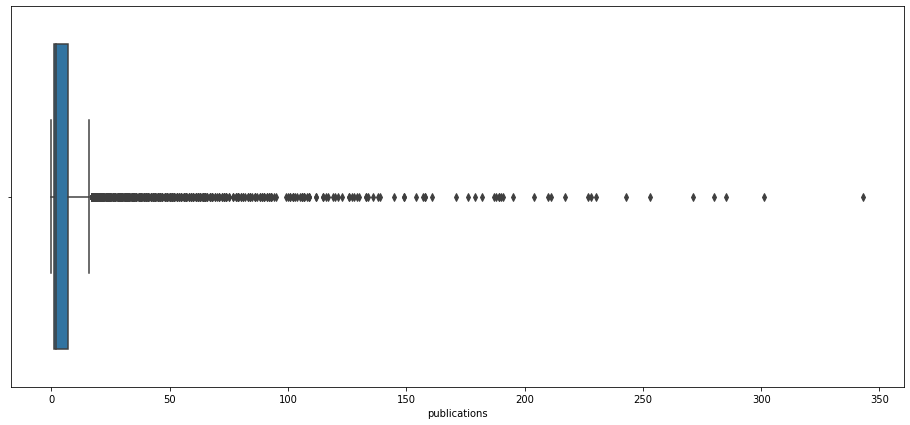

In [165]:
#Plot data to search incorrect instances in the researchers
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=researchers, x='publications',ax=ax)
#ax.set_xlim(0,200)

In [166]:
#No data instance seems incorrect in remaining researchers, we keep them as they are

# Data analytics

Once we know about the data we are using and we have cleaned it, we need to ask what kind of useful information we can extract from that data. It is a good idea to make a kind of brainstorming of possible questions, then take the list of resulting questions and sort them by their difficulty, finally begin to answer them starting by the easiest ones.

Yoy may need to use a joined dataset to answer some questions

In [167]:
# This operation creates a dataset combining researchers and publications producing a dataset with one row for each
# combination of researcher-publication in which the researcher is one of the authors of the publication
data = researchers.merge(publications.rename(columns={"authors":"auth_id"}).explode("auth_id"), on="auth_id")

In [168]:
data.head()

auth_id          name last_name  citations  cited_by  publications  \
0  7005227142  José Antonio     Cobos       5267      3940           343   
1  7005227142  José Antonio     Cobos       5267      3940           343   
2  7005227142  José Antonio     Cobos       5267      3940           343   
3  7005227142  José Antonio     Cobos       5267      3940           343   
4  7005227142  José Antonio     Cobos       5267      3940           343   

  orcid  pages                                              title  \
0   NaN     15  High-Efficiency High-Bandwidth Four-Quadrant F...   
1   NaN      8  Energy-Buffered Single-Phase Inverter Operatin...   
2   NaN      8  ZVS transitions in Multi-Mode Single Stage Inv...   
3   NaN      5  Equivalent Parameters of Round and Litz Wire C...   
4   NaN      6  Digital Variable Frequency Control of a Single...   

   document_id       date                                            journal  \
0  85058136304 2019-06-01  IEEE Journal of Emerging and Selected Topics i...   
1  85060314395 2018-12-03  2018 IEEE Energy Conversion Congress and Expos...   
2  85060302761 2018-12-03  2018 IEEE Energy Conversion Congress and Expos...   
3  85060302746 2018-12-03  2018 IEEE Energy Conversion Congress and Expos...   
4  85060299891 2018-12-03  2018 IEEE Energy Conversion Congress and Expos...   

   openaccess  cited_count              type    year  
0       False            0           Article  2019.0  
1       False            2  Conference Paper  2018.0  
2       False            1  Conference Paper  2018.0  
3       False            0  Conference Paper  2018.0  
4       False            1  Conference Paper  2018.0

## Basic results

Some of the esaiest question or more basic results we can obtain are the following:
* Numeric results
    * How many researchers are?
    * How many publications are?
    * How many of journals are?
    * How many types of publications are?
    * How many publications of each type are?
    * How many publications have each researcher in average? (Use only researchers dataset)
    * Which is the oldest publication?
    * Which is the publication with most citations?
    * Who is the researcher with more publications? (Use only researchers dataset)
    * How many researchers have ORCid?
* Graphic results
    * Histogram of the number of publications per researcher
    * Bar chart of the number of publications by type
    * Line chart of the number of publications per year

Som of those questions are just countings, sumations or rankings, but other need data aggregations with ``groupby``.

**Answer each question in a different cell of this notebook (remember that you can insert new cell from the Insert menu).**

# NUMERIC RESULTS

## How many researchers are?

In [169]:
researchers.shape[0]

7056

## How many publications are?

In [170]:
publications.shape[0]

35036

## How many of journals are?

In [171]:
len(publications.journal.unique())

7800

## How many types of publications are?

In [172]:
len(publications.type.unique())

12

## How many publications of each type are?

In [173]:
publications.groupby('type')['document_id'].count()

type
Article             21417
Article in Press       88
Book                   25
Chapter               659
Conference Paper    11491
Editorial             276
Erratum                83
Letter                 69
None                    8
Note                   95
Review                793
Short Survey           32
Name: document_id, dtype: int64

## How many publications have each researcher in average? (Use only researchers dataset)

In [174]:
researchers.publications.mean()

8.646116780045352

## Which is the oldest publication?

In [175]:
publications[publications.date == publications.date.min()]

pages                                 authors  \
33538     16  [24580537700, 6504371460, 55463179200]   

                                                   title  document_id  \
33538  Study of the impedance of a platinum electrode...  26744475991   

            date              journal  openaccess  cited_count     type  \
33538 1959-01-01  Electrochimica Acta       False           28  Article   

         year  
33538  1959.0

## Which is the publication with most citations?

In [176]:
publications[publications.cited_count == publications.cited_count.max()]

pages                               authors  \
2152     11  [6507925214, 6701794860, 7004720416]   

                                                  title  document_id  \
2152  A review of feature selection techniques in bi...  35748932917   

           date         journal  openaccess  cited_count    type    year  
2152 2007-10-01  Bioinformatics        True         2406  Review  2007.0

## Who is the researcher with more publications? (Use only researchers dataset)

In [177]:
researchers[researchers.publications == researchers.publications.max()]

auth_id          name last_name  citations  cited_by  publications orcid
0  7005227142  José Antonio     Cobos       5267      3940           343   NaN

## How many researchers have ORCid?

In [178]:
str((researchers.shape[0] - researchers.orcid.isna().sum())*100/researchers.shape[0])[0:5] +'%'

'8.375%'

# GRAPHIC RESULTS

## Histogram of the number of publications per researcher

(array([6.655e+03, 2.650e+02, 6.800e+01, 3.300e+01, 1.100e+01, 1.100e+01,
        6.000e+00, 3.000e+00, 3.000e+00, 1.000e+00]),
 array([  0. ,  34.3,  68.6, 102.9, 137.2, 171.5, 205.8, 240.1, 274.4,
        308.7, 343. ]),
 <BarContainer object of 10 artists>)

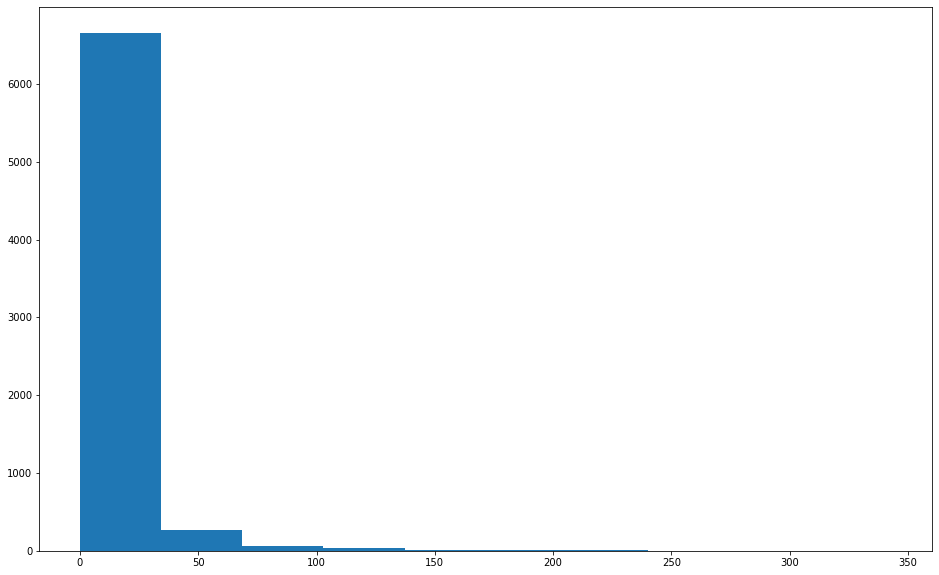

In [179]:
fig, ax = plt.subplots(nrows = 1, figsize=(16,10))

y = researchers.publications

ax.hist(y)

## Bar chart of the number of publications by type

In [180]:
pubs_by_type = publications.groupby('type')['document_id'].count()
x = pubs_by_type.index
y = pubs_by_type.values

<BarContainer object of 12 artists>

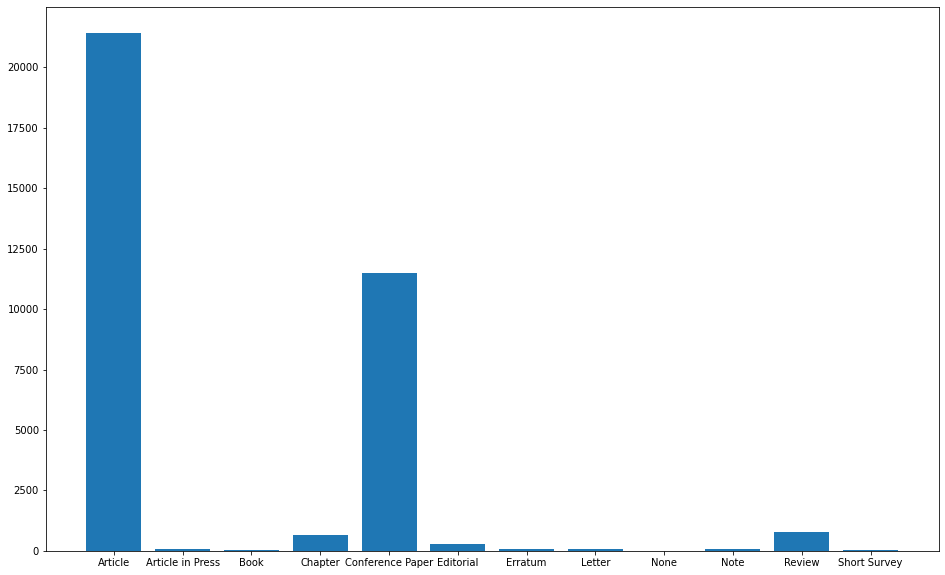

In [181]:
fig, ax = plt.subplots(nrows = 1, figsize=(16,10))

ax.bar(x, y)

## Line chart of the number of publications per year

In [182]:
pubs_by_year = publications.groupby('year')['document_id'].count()
x = pubs_by_year.index
y = pubs_by_year.values

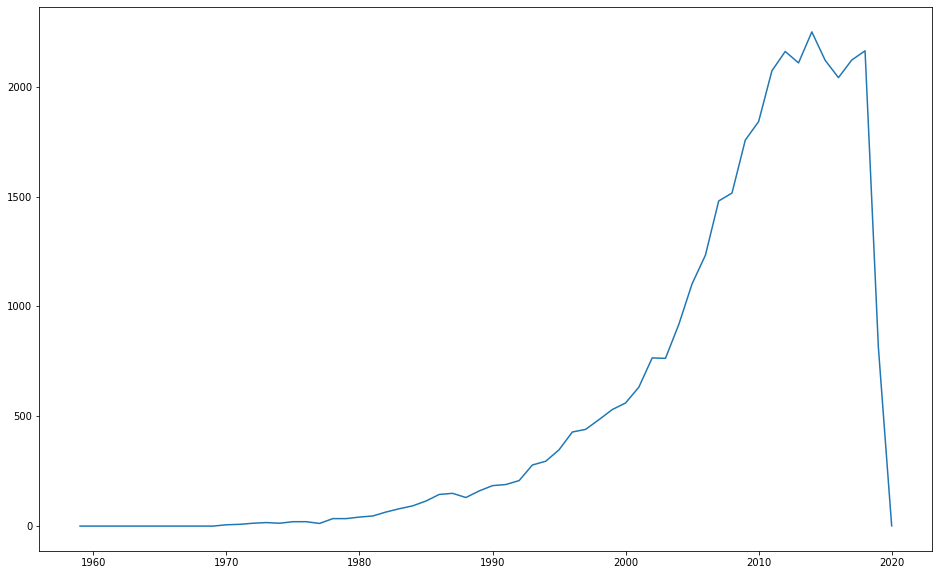

In [183]:
fig, ax = plt.subplots(nrows = 1, figsize=(16,10))

ax.plot(x, y)

# Intermediate results

* Numeric results
    * How many publications of each researcher are in the data? Is this the same number than the column ``document-count``?
    * How many authors have each publication?
    * What is the average number of authors in a publication?
    * What is the average number of pages in a publication depending of the publication type?
    * What is the average number of citations in a publication depending of the publication type?
    * How many years each researcher have been active? (difference between the publicationDate of the oldest and newest publications)
* Graphic results
    * Histogram of the number of researchers by the number of active years
    * Histogram of the number of authors in a publication
    * Scatter plot of the publication year vs the number of citations
    * Chart of the average number of citations depending on the publication type
    * Chart of the average number of pages depending on the publication type


# NUMERIC

## How many publications of each researcher are in the data? Is this the same number than the column publications?

In [184]:
researchers_pub_count1 = pd.DataFrame(data.groupby('auth_id')['document_id'].count()).reset_index().sort_values(by='auth_id')

In [185]:
researchers_pub_count2 = researchers[['auth_id','publications']].sort_values(by='auth_id')

In [186]:
researchers_pub_count1.head()

auth_id  document_id
0  6503848928            2
1  6503890565            3
2  6503896634            6
3  6503903714            1
4  6503939551            1

In [187]:
researchers_pub_count2.head()

auth_id  publications
3435  6503848928             2
2346  6503890565             4
1874  6503896634             6
6043  6503903714             1
6754  6503908970             0

## How many authors have each publication?

In [188]:
def n_authors(x) :
    if x:
        return len(x)
    else: 
        return 0
publications['n_authors'] = publications.authors.apply(n_authors)
publications.n_authors

0         8
1         5
2         5
3         5
4         5
         ..
35959     6
35960    15
35961     2
35962     2
35963     4
Name: n_authors, Length: 35036, dtype: int64

## What is the average number of authors in a publication?

In [189]:
publications.authors.apply(n_authors).mean()

5.253853179586711

## What is the average number of pages in a publication depending of the publication type?

In [190]:
data.groupby('type')['pages'].sum()/data.groupby('type')['document_id'].count()

type
Article              9.856123
Article in Press     3.348837
Book                31.266667
Chapter             19.703422
Conference Paper     5.692643
Editorial            1.064626
Erratum              0.298387
Letter               2.957143
None                 5.111111
Note                 3.950000
Review              12.696629
Short Survey         4.636364
dtype: float64

## What is the average number of citations in a publication depending of the publication type?

In [191]:
data.groupby('type')['cited_count'].sum()/data.groupby('type')['document_id'].count()

type
Article             15.768309
Article in Press     0.651163
Book                36.133333
Chapter              2.558935
Conference Paper     4.363473
Editorial            2.462585
Erratum              0.758065
Letter               9.214286
None                 5.777778
Note                 4.483333
Review              34.505618
Short Survey        13.704545
dtype: float64

## How many years each researcher have been active? (difference between the publicationDate of the oldest and newest publications)

In [192]:
max_date = data.groupby('auth_id')['date'].max()
min_date = data.groupby('auth_id')['date'].min()
years_active = (max_date - min_date).dt.days/365
years_active

auth_id
6503848928      3.583562
6503890565     30.687671
6503896634     12.008219
6503903714      0.000000
6503939551      0.000000
                 ...    
57208623083     0.000000
57208639475     0.000000
57208670663     0.000000
57208685753     0.000000
57208701829     0.000000
Name: date, Length: 5779, dtype: float64

# GRAPHICAL

## Histogram of the number of researchers by the number of active years

(array([3590.,  879.,  470.,  313.,  231.,  149.,   83.,   44.,   15.,
           5.]),
 array([ 0.        ,  5.00356164, 10.00712329, 15.01068493, 20.01424658,
        25.01780822, 30.02136986, 35.02493151, 40.02849315, 45.03205479,
        50.03561644]),
 <BarContainer object of 10 artists>)

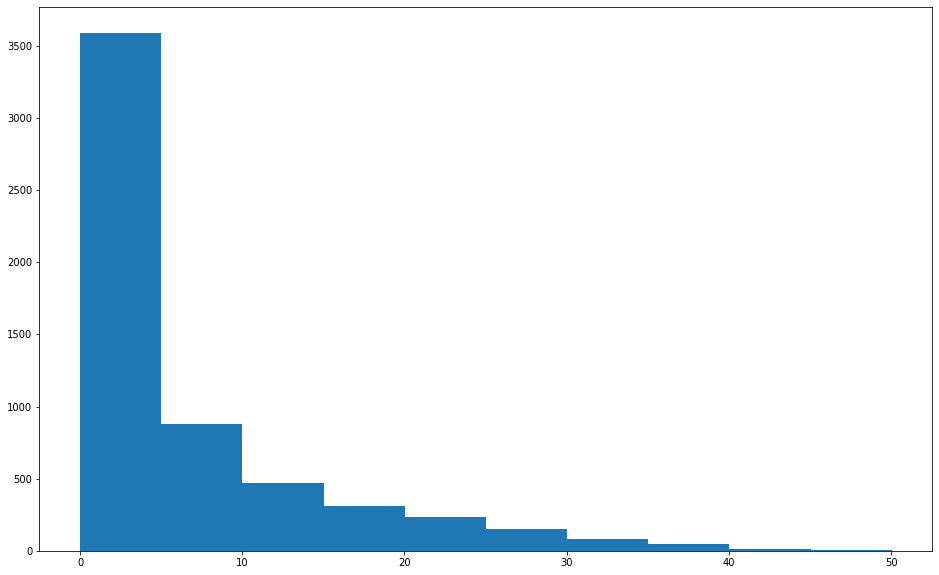

In [193]:
fig, ax = plt.subplots(nrows = 1, figsize=(16,10))

y = years_active.values

ax.hist(y)

## Histogram of the number of authors in a publication

(array([3.2819e+04, 1.6590e+03, 2.0800e+02, 7.9000e+01, 2.9000e+01,
        2.5000e+01, 2.0000e+01, 1.4000e+01, 1.3000e+01, 1.7000e+02]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

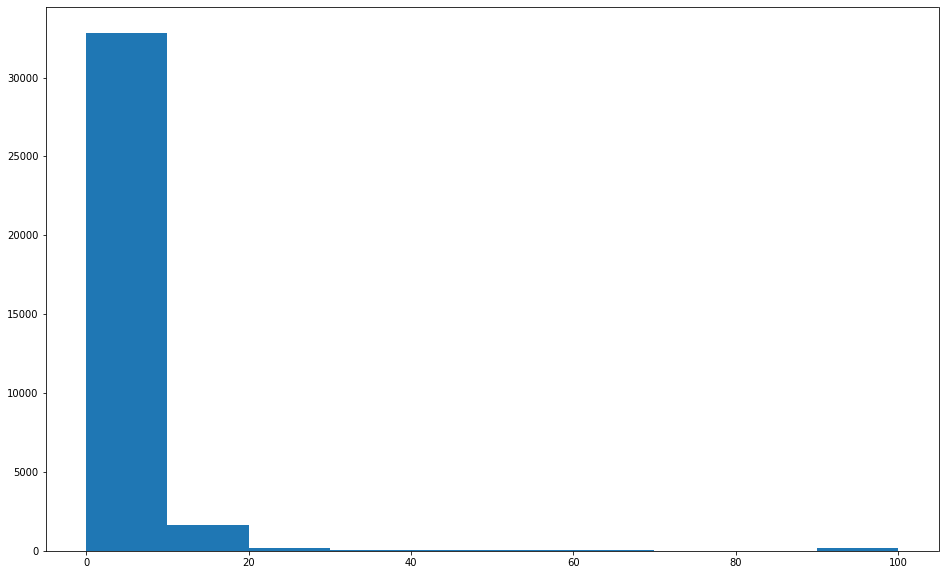

In [194]:
fig, ax = plt.subplots(nrows = 1, figsize=(16,10))

y = publications.n_authors

ax.hist(y)

## Scatter plot of the publication year vs the number of citations

<AxesSubplot:xlabel='year', ylabel='cited_count'>

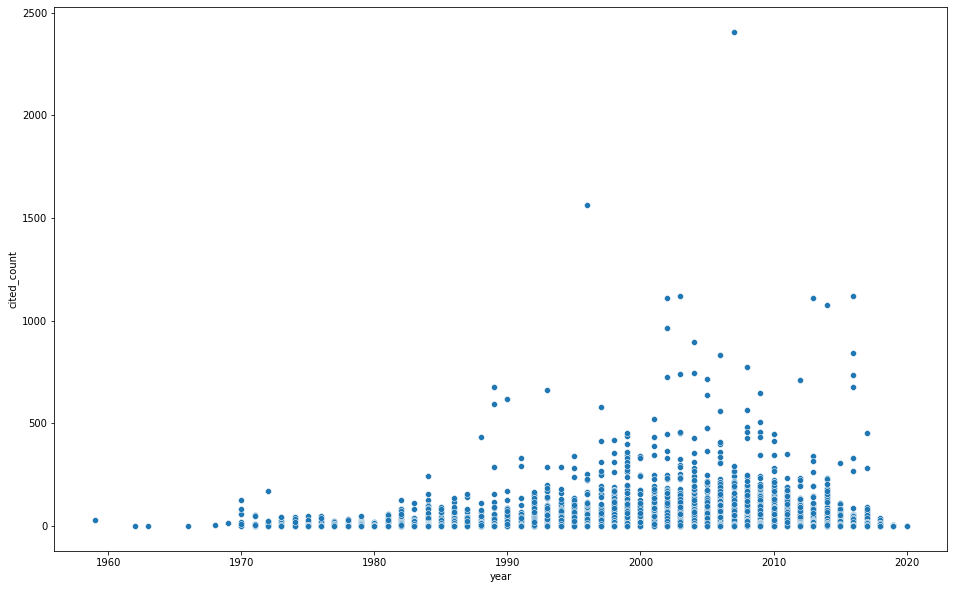

In [195]:
fig, ax = plt.subplots(figsize=(16,10))

# The parameter 'data' defines the dataframe used to generate the chart
# We need to indicate which columns will be used in each axis. 'x' and 'y' in this case
# To use the figure we will set the parameter 'ax' equal to the axis we have just defined
sns.scatterplot(data=publications, x="year",y="cited_count", ax=ax)

## Chart of the average number of citations depending on the publication type

In [196]:
avg_cit_by_type = data.groupby('type')['cited_count'].sum()/data.groupby('type')['document_id'].count()
x = avg_cit_by_type.index
y = avg_cit_by_type.values

In [197]:
fig, ax = plt.subplots(nrows = 1, figsize=(16,10))

ax.bar(x, y)

<BarContainer object of 12 artists>

## Chart of the average number of pages depending on the publication type

In [271]:
avg_pages_by_type = data.groupby('type')['pages'].sum()/data.groupby('type')['document_id'].count()
x = avg_pages_by_type.index
y = avg_pages_by_type.values

<BarContainer object of 12 artists>

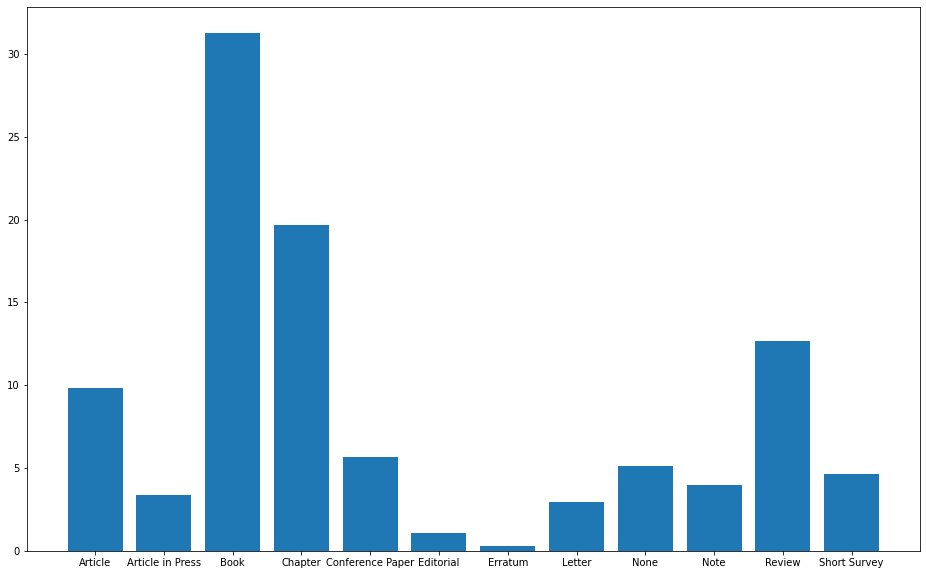

In [272]:
fig, ax = plt.subplots(nrows = 1, figsize=(16,10))

ax.bar(x, y)

## Advanced results

* Title Analysis
    * What are the most repeated words in the publication titles?
    * Plot the distribution of the number of words in the titles

* Coauthor: 
    One researcher is coatuhor with other if both appears as author in at least one publication. 
    * What is the average number of different coauthors of each researcher?
    * How is the most frequent coauthor (their id) of each researcher?


* H-index: 
    The h-index (https://en.wikipedia.org/wiki/H-index) is a metric that tries to describe the impact of a researcher based on the number of citations received in each publication. A researcher has a h-index of `n` if she has at least `n` publications with `n` or more citations.

    * What is the h-index of each researcher?
    * Chart of the publications and number of citations of a certain researcher, highlinting (in a different color) which publications contributed to the h-index

![alt text](img/h-index.svg "H-Index")


In [200]:
# This operation creates a dataset combining researchers and publications producing a dataset with one row for each
# combination of researcher-publication in which the researcher is one of the authors of the publication
data = researchers.merge(publications.rename(columns={"authors":"auth_id"}).explode("auth_id"), on="auth_id")

In [201]:
data.head()

auth_id          name last_name  citations  cited_by  publications  \
0  7005227142  José Antonio     Cobos       5267      3940           343   
1  7005227142  José Antonio     Cobos       5267      3940           343   
2  7005227142  José Antonio     Cobos       5267      3940           343   
3  7005227142  José Antonio     Cobos       5267      3940           343   
4  7005227142  José Antonio     Cobos       5267      3940           343   

  orcid  pages                                              title  \
0   NaN     15  High-Efficiency High-Bandwidth Four-Quadrant F...   
1   NaN      8  Energy-Buffered Single-Phase Inverter Operatin...   
2   NaN      8  ZVS transitions in Multi-Mode Single Stage Inv...   
3   NaN      5  Equivalent Parameters of Round and Litz Wire C...   
4   NaN      6  Digital Variable Frequency Control of a Single...   

   document_id       date                                            journal  \
0  85058136304 2019-06-01  IEEE Journal of Emerging and Selected Topics i...   
1  85060314395 2018-12-03  2018 IEEE Energy Conversion Congress and Expos...   
2  85060302761 2018-12-03  2018 IEEE Energy Conversion Congress and Expos...   
3  85060302746 2018-12-03  2018 IEEE Energy Conversion Congress and Expos...   
4  85060299891 2018-12-03  2018 IEEE Energy Conversion Congress and Expos...   

   openaccess  cited_count              type    year  n_authors  
0       False            0           Article  2019.0          8  
1       False            2  Conference Paper  2018.0          5  
2       False            1  Conference Paper  2018.0          5  
3       False            0  Conference Paper  2018.0          5  
4       False            1  Conference Paper  2018.0          5

# TITLE ANALYSIS

## What are the most repeated words in the publication titles?

In [202]:
def split_words(x):
    return x.split(" ")
publications['title_words'] = publications.title.apply(split_words)
publications.title_words.head()

0    [High-Efficiency, High-Bandwidth, Four-Quadran...
1    [Energy-Buffered, Single-Phase, Inverter, Oper...
2    [ZVS, transitions, in, Multi-Mode, Single, Sta...
3    [Equivalent, Parameters, of, Round, and, Litz,...
4    [Digital, Variable, Frequency, Control, of, a,...
Name: title_words, dtype: object

In [203]:
publications.explode('title_words').groupby('title_words')[['document_id']].count().sort_values(by='document_id',ascending=False).iloc[0:10]

document_id
title_words             
of                 24990
and                13373
in                 13030
the                11906
for                 9697
a                   5596
on                  4569
to                  4388
A                   4116
with                3358

## Plot the distribution of the number of words in the titles

In [204]:
def n_words(x) :
    return len(x)

publications['title_n_words'] = publications.title_words.apply(n_words)

(array([1.7720e+03, 1.3758e+04, 1.3374e+04, 4.7760e+03, 1.0940e+03,
        2.1000e+02, 4.4000e+01, 7.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <BarContainer object of 10 artists>)

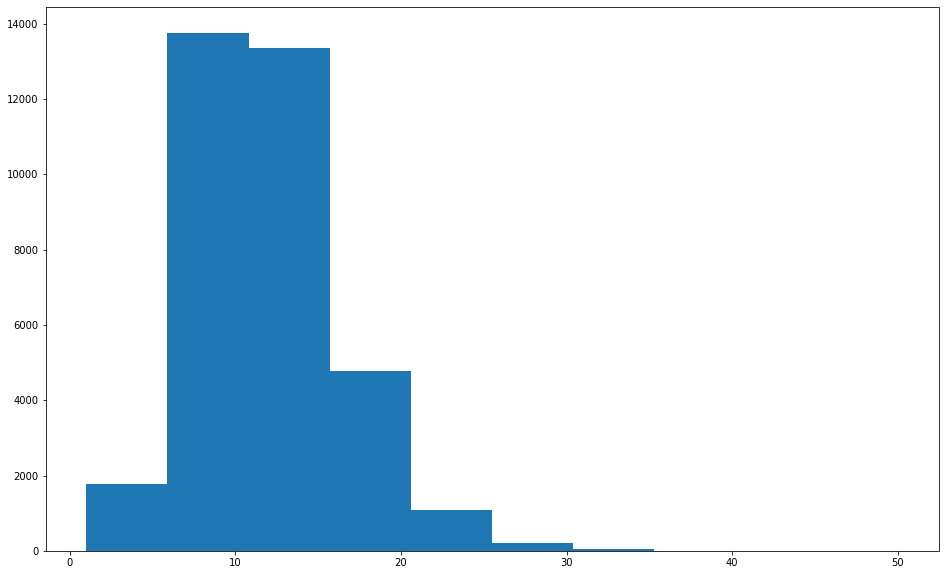

In [205]:
fig, ax = plt.subplots(nrows = 1, figsize=(16,10))

y = publications.title_n_words

ax.hist(y)

<AxesSubplot:xlabel='title_n_words'>

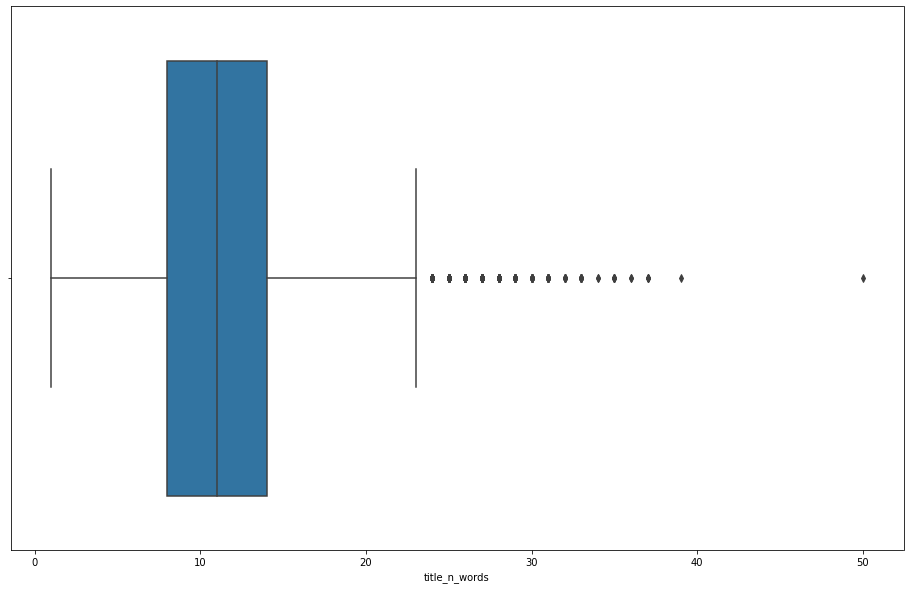

In [206]:
fig, ax = plt.subplots(nrows = 1, figsize=(16,10))
sns.boxplot(data = publications, x = 'title_n_words', ax = ax)

# COAUTHOR

## What is the average number of different coauthors of each researcher?

In [207]:
avg_coauthors_list = []
for researcher in researchers.itertuples() :
    author_pubs = data[data.auth_id == researcher.auth_id]
    author_pubs = author_pubs.drop_duplicates(subset=['document_id'])
    avg_coauthors = round((author_pubs.n_authors - 1).mean(),3)
    avg_coauthors_list.append(avg_coauthors)

researchers['avg_coauthors'] = avg_coauthors_list

(array([5.578e+03, 1.490e+02, 2.000e+01, 1.400e+01, 5.000e+00, 5.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 4.000e+00]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

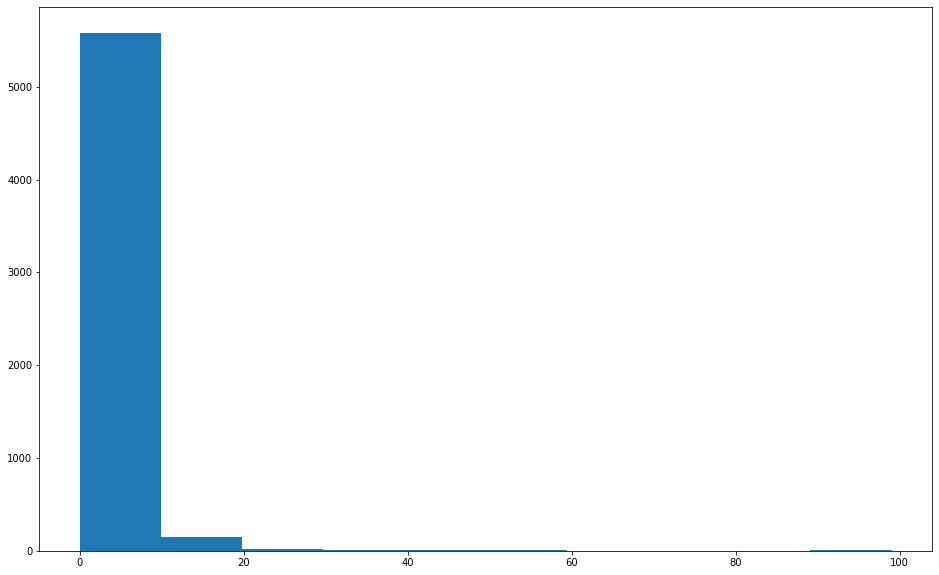

In [208]:
fig, ax = plt.subplots(nrows = 1, figsize=(16,10))

y = researchers.avg_coauthors

ax.hist(y)

<AxesSubplot:xlabel='avg_coauthors'>

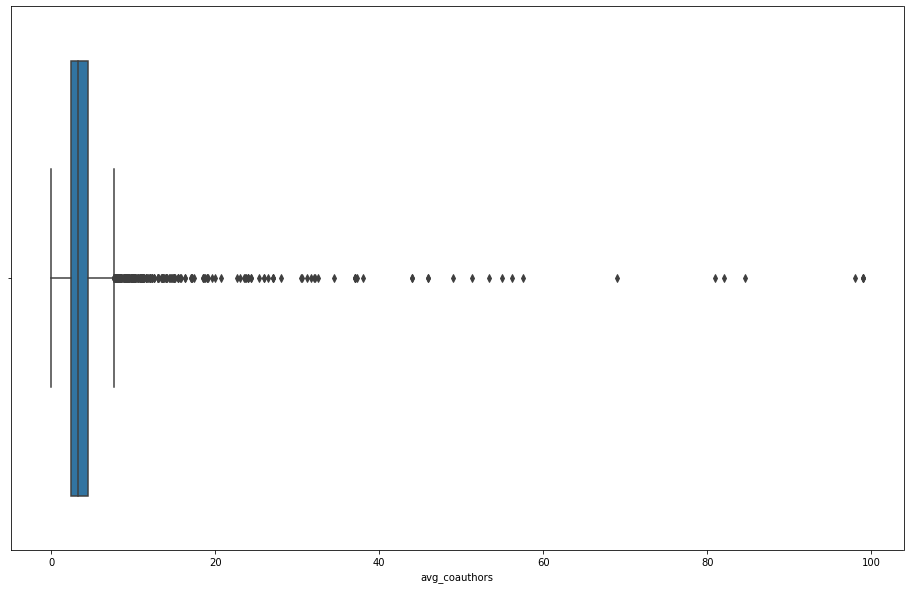

In [209]:
fig, ax = plt.subplots(nrows = 1, figsize=(16,10))
sns.boxplot(data = researchers, x = 'avg_coauthors', ax = ax)

## How is the most frequent coauthor (their id) of each researcher?

In [210]:
most_freq_coauthor_list = []
most_freq_coauthor_aps_list = []

for researcher in researchers.itertuples() :
    author_pubs = data[data.auth_id == researcher.auth_id]
    author_doc_ids = author_pubs.document_id.unique().tolist()
    coauthors = data[(data.document_id.isin(author_doc_ids)) & (data.auth_id != researcher.auth_id)][['auth_id']]
    if coauthors.shape[0] > 0 :
        most_freq_coauthors = coauthors.auth_id.value_counts()
        most_freq_coauthor = str(most_freq_coauthors.index.tolist()[0])
        most_freq_coauthor_aps = most_freq_coauthors.iloc[0]
    else :
        most_freq_coauthor = None
        most_freq_coauthor_aps = 0
    most_freq_coauthor_list.append(most_freq_coauthor)
    most_freq_coauthor_aps_list.append(most_freq_coauthor_aps)

researchers['most_freq_coauthor'] = most_freq_coauthor_list
researchers['most_freq_coauthor_aps'] = most_freq_coauthor_aps_list

In [211]:
researchers.head()

auth_id          name       last_name  citations  cited_by  \
0   7005227142  José Antonio           Cobos       5267      3940   
1  55708653400        Javier          LLorca       9830      6350   
2   7007057622        Manuel          Elices       8251      4563   
3   6701646524    Marcela G.  González-Gross       7167      5244   
4   8899577600        Javier            Bajo       2213      1376   

   publications                orcid  avg_coauthors most_freq_coauthor  \
0           343                  NaN          4.311        22955661300   
1           301                  NaN          3.385         7403372571   
2           285                  NaN          3.486         7003837077   
3           280                  NaN         17.201        24447686700   
4           271  0000-0003-0824-4133          3.775        57190211866   

   most_freq_coauthor_aps  
0                     188  
1                     104  
2                      97  
3                      48  
4                      12

# H-Index
The h-index (https://en.wikipedia.org/wiki/H-index) is a metric that tries to describe the impact of a researcher based on the number of citations received in each publication. A researcher has a h-index of n if she has at least n publications with n or more citations.

## What is the h-index of each researcher?

In [212]:
h_index_list = []

for researcher in researchers.itertuples() :
    author_pubs = data[data.auth_id == researcher.auth_id]
    author_pubs = author_pubs.sort_values(by='cited_count',ascending=False)
    author_pub_citations = author_pubs.cited_count.tolist()
    
    h_index = 0
    for citations in author_pub_citations:
        if citations > h_index :
            h_index += 1
        else :
            break
    
    h_index_list.append(h_index)

researchers['h_index'] = h_index_list

In [213]:
researchers.head()

auth_id          name       last_name  citations  cited_by  \
0   7005227142  José Antonio           Cobos       5267      3940   
1  55708653400        Javier          LLorca       9830      6350   
2   7007057622        Manuel          Elices       8251      4563   
3   6701646524    Marcela G.  González-Gross       7167      5244   
4   8899577600        Javier            Bajo       2213      1376   

   publications                orcid  avg_coauthors most_freq_coauthor  \
0           343                  NaN          4.311        22955661300   
1           301                  NaN          3.385         7403372571   
2           285                  NaN          3.486         7003837077   
3           280                  NaN         17.201        24447686700   
4           271  0000-0003-0824-4133          3.775        57190211866   

   most_freq_coauthor_aps  h_index  
0                     188       33  
1                     104       54  
2                      97       53  
3                      48       42  
4                      12       28

## Chart of the publications and number of citations of a certain researcher, highlinting (in a different color) which publications contributed to the h-index

In [250]:
# This operation creates a dataset combining researchers and publications producing a dataset with one row for each
# combination of researcher-publication in which the researcher is one of the authors of the publication
data = researchers.merge(publications.rename(columns={"authors":"auth_id"}).explode("auth_id"), on="auth_id")

In [251]:
auth_id = researchers.auth_id.iloc[0]
h_index = researchers[researchers.auth_id == auth_id].h_index.iloc[0]
author_pubs = data[data.auth_id == auth_id]

In [253]:
researchers[researchers.auth_id == auth_id]

auth_id          name last_name  citations  cited_by  publications  \
0  7005227142  José Antonio     Cobos       5267      3940           343   

  orcid  avg_coauthors most_freq_coauthor  most_freq_coauthor_aps  h_index  
0   NaN          4.311        22955661300                     188       33

In [254]:
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.templates.default = 'plotly_white'
pd.set_option("display.precision", 3)

In [268]:
author_pubs['h_index_contrib'] = author_pubs['cited_count'] > author_pubs['h_index']

In [270]:
fig = px.bar(author_pubs, x='document_id', y='cited_count',
             hover_data=['title', 'n_authors'], color='h_index_contrib')
fig.update_layout(xaxis_type='category')
fig.show()